In [1]:
using TaylorSeries 
using PyPlot
using LinearAlgebra


In [2]:
"""

PolinomioTaylor1(g,CX,CY,TipoVariable)
   
   Es una función cuyo objetivo es recibir dos listas con valores iniciales y crear dos polinomios de grado g.




Argumentos:





   - g       : Grado del polinomio
   - CX,CY  :  Arreglo que contiene los coeficientes iniciales, es del tipo Array{TaylorSeries.TaylorN{}}
   - TipoVariable :  es el tipo del que serán los coeficientes ( Real, Float64, BigFloat)
   

Esta función regresa dos arreglos que contienen elementos del tipo Taylor1.TaylorN, creados con las listas iniciales. 


"""
function PolinomioTaylor1(g::Real,CX,CY,TipoVariable)
    #=
    g es el grado del polinomio, CX y CY son
    arreglos que contienen los coeficientes que forman la variedad.
    
    
    Creamos x,y como variables tipo TaylorN de orden 2
    =#
    x,y = set_variables(TipoVariable, "x y", order=2)
    
    #especificamos que LX,LY son de arreglos que guardarán coeficientes del polinomio, sólo son auxiliares en esta función
    LX = Array{TaylorSeries.TaylorN{TipoVariable}}(1)
    LY = Array{TaylorSeries.TaylorN{TipoVariable}}(1)
    
    #usamos un condicional para separar el caso 1 del resto
    if g == 1  
        T = [Taylor1([x], g),Taylor1([y], g)]
    #en el caso en que g>1 entonces usamos las listas que van guardando los coeficientes
    else
        #como CX,CY están guardando los coeficientes pero necesitamos agregar el último término que será una variable 
        LX = push!(CX, x) 
        LY = push!(CY, y)

        T=[Taylor1(LX, g),Taylor1(LY, g)]
        
    end
    return T
end
#Esta función regresa tx,ty que son Taylor1.TaylorN

PolinomioTaylor1

In [3]:
?PolinomioTaylor1

search:



In [4]:
#=Esta función toma el arreglo que contiene las lambdas que se van calculando, los coeficientes de los polinomios
y el orden de los mismos, lo que hace es generar el lado derecho de la ecuación cohomológica, multiplicando a_n*λ^n
y generando un polinomio de gradno g con estos coeficientes
=#
"""
Vecλ(λ_v,g,CX,CY)
Es una función que calcula la parte derecha de la ecuación comohológica, es decir la parte que involucra el valor propio.
Regresa un arreglo de tipo TaylorSeries.TaylorN{T}


Sus argumentos son:



- g      :  grado del polinomio.
- λ_v    :  Arreglo de dos dimensiones que contiene el valor propio y sus potencias. 
- CX,CY  :  Los arreglos con los polinomios que se calculan en PolinomioTaylor1.

"""
function Vecλ(λ_v,g,CX,CY)
   # el arreglo de λ_v contiene los arreglos que corresponden a la parte derecha de la ecuación cohomológica
    # en θ,p. Es importante hacer la distinción puesto que dependiendo del punto fijo donde se esté calculando
    # el primer valor de λ en θ serpa diferente del primer valor de λ en P
    xλt=Taylor1(λ_v[1].*CX,g)
    yλt=Taylor1(λ_v[2].*CY,g)
    
    λvec=[xλt,yλt]
    
    return λvec
end

Vecλ

In [5]:
?Vecλ

search: vec Vector vecdot vecnorm VecOrMat VecElement @vectorize_2arg



Vecλ(λ_v,g,CX,CY) Es una función que calcula la parte derecha de la ecuación comohológica, es decir la parte que involucra el valor propio. Regresa un arreglo de tipo TaylorSeries.TaylorN{T}

Sus argumentos son:

  * g      :  grado del polinomio.
  * λ_v    :  Arreglo de dos dimensiones que contiene el valor propio y sus potencias.
  * CX,CY  :  Los arreglos con los polinomios que se calculan en PolinomioTaylor1.


In [6]:
function ValPropios(M)
    V = BigFloat[]
    
    #while true
        disc = trace(M)^2-4.*det(M)
        tol = disc -trace(M)^2
        if  tol > 1e-70
            println("Para este caso el método de calculo de valores propios no es eficiente")
            #break
        else
            disc >= 0.? v = ((trace(M) + sqrt(trace(M)^2-4.*det(M)))/2.,(trace(M) - sqrt(trace(M)^2-4.*det(M)))/2.)  : error("Error: el valor propio es complejo, es decir es un punto elíptico")
            v_prop1 = v[1]
            v_prop2 = v[2]
            push!(V,v_prop1)
            push!(V,v_prop2)
            ValoresP = sort(V,rev=true)
        end
    #end
return ValoresP
end
        
    
    
    

ValPropios (generic function with 1 method)

In [7]:
function VecPropios(M,ValoresP)
    Vectores = []
    for i in [1,2]
        y = big.(1.)
        I_2 = big.([1. 0.; 0. 1.])
        M_aux = -I_2.*ValoresP[i]+M
        x = -(y*M_aux[3])/M_aux[1]
        norma = sqrt(y^2+x^2)
        push!(Vectores,x/norma)
        push!(Vectores,y/norma)
        @show(Vectores)
        
    end
    return Vectores
end

VecPropios (generic function with 1 method)

In [8]:
function EigenValores(M)
    ValoresP  = ValPropios(M)
    VectoresP = VecPropios(M,ValoresP)
    V = (ValoresP,[VectoresP[1] VectoresP[3];VectoresP[2] VectoresP[4]])
    return V
end

EigenValores (generic function with 1 method)

In [9]:
function Orden1(CX,CY,TipoVariable,Mapeo,k,l,PuntoFijo,tipo_v,λarrayX,λarrayY)
            #usamos la función PolinomioTaylor para crear el polinomio tipo Taylor1.TaylorN{T}
            t = PolinomioTaylor1(1,CX,CY,TipoVariable)
            
            #Aplicamos el mapeo a los polinomios que resultan de la función anterior.
            Or1 = Mapeo(t[1],t[2],k,l)
            
            AuxOr1=[Or1[1][1],Or1[2][1]]
            
            #Calculamos el jacobiano del Orden 1 para obtener sus valores y vectores propios.
            JPO = jacobian(AuxOr1,[PuntoFijo[1],PuntoFijo[2]])
            
            
            
            #Calculamos los valores y vectores propios
            if TipoVariable == BigFloat
                eigval,eigvec = EigenValores(JPO)
            else
                eigval,eigvec = eig(JPO)
            end
            #escogemos el tipo de variedad que queremos calcular. Como se ordenan de menor a mayor la inestable es la segunda
            λ = eigval[tipo_v]
    
            tt = imag(λ)
            
            #Ponemos los coeficientes en una variable nueva cada uno y los agregamos a las listas CX,CP,λ
            tt == 0.?  Coef = eigvec[:,tipo_v] : error("Error: el valor propio es complejo, es decir es un punto elíptico")
            
            
            push!(CX, Coef[1])
            push!(CY, Coef[2])
            push!(λarrayX, λ)
            push!(λarrayY, λ)
            λ_v=[λarrayX,λarrayY]
            
            
    return CX, CY,λarrayX,λarrayY, λ_v
end
            
    

Orden1 (generic function with 1 method)

In [10]:
#Creamos una función que reciba el orden del polinomio , el punto fijo, el parámetro k y 
#el tipo de varidad que queremos(estable=1, inestable=2)
"""
Variedades(Mapeo,orden, PuntoFijo,k,tipo_v,TipoVariable)
Es una función que calcula las variedades de cierto mapeo. Usa las funciones de PolinomioTaylor1 y Vecλ para calcular los
polinomios de cada lado de la ecuación cohomológica y les aplica el mapeo dado. 



Argumentos:



- Mapeo : Mapeo de dos dimensiones, debe recibir al menos dos parámetros que son los polinomios antes calculados.
- orden : se trata del orden del polinomio.
- PuntoFijo : ES el punto fijo donde queremos calcular la variedad.
- k     : Es la constante del mapeo.
- tipo_v : 1 si la variedad es estable, 2 si es inestable.
- TipoVariable :  Float64,BigFloat, Integer,etc.


"""
function Variedades(Mapeo,orden, PuntoFijo,k,l,tipo_v, TipoVariable)
   
    #definimos unas listas donde se guardarán los coeficientes  de todo el polinomio, tales deben ser
    # de tipo "Array{TaylorSeries.TaylorN{Int64},1}" dado que los términos que se van agregando 
    # en cada orden son de tipo TaylorN.
    
    a=TipoVariable(PuntoFijo[1])
    b=TipoVariable(PuntoFijo[2])
    CX = [a+TaylorN(0.)]
    CY = [b+TaylorN(0.)]
    
    
    #λarray es la lista que contiene a los coeficientes del polinomio de λ
    λarrayX = [a^0]
    λarrayY = [b^0]
    
    #definimos un vector que contiene el punto en el que se evalúa el jacobiano que se calcula después
    #dado que sólo lo usamos para obtener los valores que resultaron en el mapeo evaluamos siempre en [1.,1.]
    
    
    
    
    CX,CY,λarayX, λarrayY,λ_v = Orden1(CX,CY,TipoVariable,Mapeo,k,l,PuntoFijo,tipo_v,λarrayX,λarrayY)
    


    for g in 2:orden
        
            #Creamos los polinomios con las listas correspondientes 
            t = PolinomioTaylor1(g,CX,CY,TipoVariable)
            
            # aplicamos el mapeo estándar y al resultado le llamamos OrG por Orden g.
            OrG = Mapeo(t[1],t[2],k,l)
            
            push!(λarrayX,λarrayX[2]^g)
            push!(λarrayY,λarrayY[2]^g)
            λ_v=[λarrayX,λarrayY]
            
            #agregamos el término correspondiente a λ 
            λ_vec=Vecλ(λ_v,g,CX,CY)
            
            
            
            # ahora ya tengo las dos partes de la ecuación y debo igualarlas para resolver.
            EcuaCohomo=OrG-λ_vec
            
            
            # de esta ecuación necesitamos solo los de orden g, así que los extraemos manualmente 
            X_g=EcuaCohomo[1].coeffs[g+1]
            Y_g=EcuaCohomo[2].coeffs[g+1]
            vec_orden_g=[X_g,Y_g]
            
            
            #calculamos el término independiene en la ecuación
            X_ind=EcuaCohomo[1].coeffs[g+1].coeffs[1].coeffs[1]
            Y_ind=EcuaCohomo[2].coeffs[g+1].coeffs[1].coeffs[1]
            vec_ind=[-X_ind,-Y_ind]
            
            #calculamos el jacobiano
            JacOrdenG = jacobian(vec_orden_g)
            
            
            
            
            #Con esta información podemos evaluar lo siguiente:
            # Si el vector de términos independientes es cero y el determinante del jacobiano es distinto de cero
            # entonces la solución a la ecuación cohomológica es la trivial
            if norm(vec_ind)==0.
                if det(JacOrdenG)!=0.
                    
                    CX[g+1]=0.
                    CY[g+1]=0.
                end
            else
                # Si el vector de términos independientes es distinto de ceroentonces necesitamos 
                #resolver la ecuación JacOrdenG[x_g,p_g]*[x,p]**=vec_ind[x_g,p_g]
                # entonces solo se trata de invertir el jacobiano y multiplicar con el vector del lado izquierdo
                TermG=JacOrdenG \ vec_ind
                
                CX[g+1]=TermG[1]
                CY[g+1]=TermG[2]
            
            end
            

    end
    return CX,CY,λarrayX, λarrayY
end

Variedades

In [11]:
"""
PolinomioCohomo(Mapeo,Pol_vec,λvec, k)
Esta función calcula la ecuación cohomológica con los polinomios que ya se calcularon. Regresa un arreglo de dos 
elementos que son los valores de x,θ del mapeo.


Argumentos:




- Mapeo : función o mapeo del cual calculamos las variedades.Debe ser una función que reciba tres parámetros
 que son dos de sus variables y la constante del mapeo. Como salida debe tener un arreglo de dos elementos. 
- Pol_vec : Es un arreglo de dos elementos que son los polinomios calculados con anterioridad. 
- k     : es el valor de la constante del mapeo 
- λvec : 

"""
function PolinomioCohomo(Mapeo,Pol_vec,λvec, k,l ,PuntoFijo,modulo)
    Map_vec=Mapeo(Pol_vec[1],Pol_vec[2],k,l)
    if modulo==2*pi
        Ec_Cohomo = mod(Map_vec-λvec,modulo)
    else
        Ec_Cohomo = Map_vec-λvec
    end
    return Ec_Cohomo
end

PolinomioCohomo

In [12]:
"""
EvaluarPol(Ec_2var,Tiempo,paso)

Es una función que toma un arreglo de dos dimensiones que contiene polinomios y los evalúa en el tiempo dado en los pasos deseados




Argumentos:




- Ec_2var : Arreglo de dos dimensiones que contiene polinomios en cada una de ellas. 
- Tiempo  : Valor hasta el cual se quiere evaluar cada polinomio
- paso    : es el paso que se considera en cada evaluación del polinomio. 

"""
function EvaluarPol(Ec_2var,Tiempo,paso,TipoVariable)
    
    
    
    
    
    Val=TipoVariable[]
    Tiem=TipoVariable[]
    
    
    for t = 0:paso:Tiempo
        x = evaluate(Ec_2var[1], t)
        y = evaluate(Ec_2var[2], t)

        
        norma = norm([x,y],Inf)
        push!(Val,norma)
        push!(Tiem,t)
    
    end
    return Tiem,Val
end

EvaluarPol

In [13]:
"""
CreaPol es una función que dadas dos listas y un grado crea  un arreglo de dos entradas , en cada una de ellas se encuentra 
el polinomio de grado g con los coeficientes de las listas. 


Argumentos:



- A,B : arreglos que contienen lo que serán los coeficientes del polinomio.
- orden : grado del polinomio
"""
function CreaPol(A,B,orden)
    Taylor = [Taylor1(A,orden),Taylor1(B,orden)]
    return Taylor
end

CreaPol

In [14]:
function Convergencia(A,B)
    A_aux = []
    B_aux = []
    Con_x = []
    Con_y = []
    suma_A = 0.
    suma_B = 0.
    
    for i in 1:length(A)
        if A[i] != 0
            push!(A_aux,A[i])
        end
        if B[i] != 0
            push!(B_aux,B[i])
        end
    end
    for i in 1:length(A_aux)-1
        push!(Con_x,A_aux[i+1]/A_aux[i])
        push!(Con_y,B_aux[i+1]/B_aux[i])
    end
        
    #=
    for i in 1:length(A_aux)-1        
        suma_A = suma_A + A[i+1]/A[i]
    end
    for i in 1:length(B_aux)-1
        suma_B = suma_B + B[i+1]/B[i]
    end
    =#
    return Con_x,Con_y
end
        
        

Convergencia (generic function with 1 method)

In [15]:
function MetParametrización(Mapeo,modulo,orden,PuntoFijo,k,l,tipo_v,Tiempo,paso, TipoVariable)
    CoeficienteX,CoeficienteY,λarrayX,λarrayY = Variedades(Mapeo,orden,PuntoFijo,k,l,tipo_v,TipoVariable)
    
    Conver_X,Conver_Y=Convergencia(CoeficienteX,CoeficienteY) 
    
    X = TipoVariable[]
    Y = TipoVariable[]
    
    for i in 1:orden+1
            
        push!(X,CoeficienteX[i].coeffs[1].coeffs[1])
        push!(Y,CoeficienteY[i].coeffs[1].coeffs[1])
        
    end
    
    Taylor=CreaPol(X,Y,orden)
    
    λ_vec=CreaPol(X.*λarrayX,Y.*λarrayY,orden)
    
    
    
    Ecua_Cohomo = PolinomioCohomo(Mapeo,Taylor,λ_vec, k,l,PuntoFijo,modulo)
    Valor_t , Error = EvaluarPol(Ecua_Cohomo,Tiempo,paso, TipoVariable)
    ErrorV = [Valor_t,Error]
    
    
    return Taylor,ErrorV,λ_vec, Conver_X,Conver_Y
   
end

MetParametrización (generic function with 1 method)

Aquí vemos que si el punto  que se introduce es elíptico entonces resulta un error.

In [16]:
function Henon(x,y,a,b)
   
    x_n = a-b*y-x^2
    y_n = x 

    return [x_n,y_n]
end

Henon (generic function with 1 method)

#Usando Float64
Polinomio,E,ValProp,ConverX,ConverY = MetParametrización(Henon,1., 25, [.22,.22], .5, 1., 2, 2.9, 0.125, Float64)

Calculamos el mismo polinomio pero ahora usando BigFloat para ver la diferencia sobre todo en el error. 

#Usando BigFloat
PolinomioB,EBig,ValPropB,ConverX,ConverY = MetParametrización(Henon,1.,25,[.22,.22],.5 ,1.0,2,2.9,0.125,BigFloat)

Graficamos ahora para valores en los que estamos seguron son puntos hiperbólicos.

In [17]:
parametro = 3.
x1 = -1.+(1.+parametro)^.5
x2 = -1.-(1.+parametro)^.5
@show(x1,x2)


x1 = 1.0
x2 = -3.0


-3.0

In [18]:
Polinomio,E,ValProp,ConverX,ConverY = MetParametrización(Henon,1., 25, [-3.,-3.], 3., 1., 2, 60., 0.125, Float64)

(TaylorSeries.Taylor1{Float64}[ - 3.0 + 0.16910197872576274 t - 0.0010212671146060113 t² + 1.7989405196606992e-6 t³ - 1.4384976675477913e-9 t⁴ + 6.191820225703751e-13 t⁵ - 1.628680867511824e-16 t⁶ + 2.842842520068909e-20 t⁷ - 3.483719438745041e-24 t⁸ + 3.12635024358281e-28 t⁹ - 2.1252881339887887e-32 t¹⁰ + 1.1251004002703104e-36 t¹¹ - 4.745065182924098e-41 t¹² + 1.6246881388245536e-45 t¹³ - 4.588360278501107e-50 t¹⁴ + 1.0833423268684392e-54 t¹⁵ - 2.1636322128836434e-59 t¹⁶ + 3.693380204444548e-64 t¹⁷ - 5.433407447296043e-69 t¹⁸ + 7.0010539753299e-74 t¹⁹ - 8.096408020401043e-79 t²⁰ + 8.236092143148846e-84 t²¹ - 1.6756372361549572e-88 t²² - 5.113639026351798e-93 t²³ + 𝒪(t²⁶), - 3.0 + 0.9855985596534887 t - 0.0346930185996797 t² + 0.0003561811371028751 t³ - 1.6600250618174164e-6 t⁴ + 4.164618191750326e-9 t⁵ - 6.384754732667188e-12 t⁶ + 6.495497160299569e-15 t⁷ - 4.63931794869163e-18 t⁸ + 2.4266099068085903e-21 t⁹ - 9.614606730191323e-25 t¹⁰ + 2.966581998326824e-28 t¹¹ - 7.292201204663291e

In [19]:
ConverX,ConverY

(Any[ - 0.05636732624192091 + 𝒪(‖x‖¹), - 0.0060393563830629556 + 𝒪(‖x‖¹), - 0.0017614789450600317 + 𝒪(‖x‖¹), - 0.0007996360367818657 + 𝒪(‖x‖¹), - 0.00043043658431917754 + 𝒪(‖x‖¹), - 0.0002630374927151105 + 𝒪(‖x‖¹), - 0.00017454877605408293 + 𝒪(‖x‖¹), - 0.00012254352515666598 + 𝒪(‖x‖¹), - 8.974173433177018e-5 + 𝒪(‖x‖¹), - 6.797984769464601e-5 + 𝒪(‖x‖¹)  …   - 2.8241483204405876e-5 + 𝒪(‖x‖¹), - 2.3610663965174453e-5 + 𝒪(‖x‖¹), - 1.99718238568038e-5 + 𝒪(‖x‖¹), - 1.7070277390269064e-5 + 𝒪(‖x‖¹), - 1.4711205309319569e-5 + 𝒪(‖x‖¹), - 1.2885199652777747e-5 + 𝒪(‖x‖¹), - 1.1564555921052629e-5 + 𝒪(‖x‖¹), - 1.0172526041666664e-5 + 𝒪(‖x‖¹), - 2.0345052083333332e-5 + 𝒪(‖x‖¹), 3.0517578125e-5 + 𝒪(‖x‖¹)],Any[ - 0.32853285321782955 + 𝒪(‖x‖¹), - 0.03519994855905317 + 𝒪(‖x‖¹), - 0.010266651663057177 + 𝒪(‖x‖¹), - 0.004660620366703907 + 𝒪(‖x‖¹), - 0.002508768263529015 + 𝒪(‖x‖¹), - 0.0015330948573664498 + 𝒪(‖x‖¹), - 0.0010173448209475884 + 𝒪(‖x‖¹), - 0.0007142360059899813 + 𝒪(‖x‖¹), - 0.0005230531585990862

In [20]:
evaluate.(ConverY[:])

23-element Array{Float64,1}:
 -0.328533   
 -0.0351999  
 -0.0102667  
 -0.00466062 
 -0.00250877 
 -0.00153309 
 -0.00101734 
 -0.000714236
 -0.000523053
 -0.000396216
 -0.000308549
 -0.000245812
 -0.000199563
 -0.000164604
 -0.000137614
 -0.000116401
 -9.94708e-5 
 -8.57784e-5 
 -7.4574e-5  
 -6.53087e-5 
 -5.75739e-5 
 -5.10604e-5 
 -4.55316e-5 

In [21]:
PolinomioB,EBig,ValPropB,ConverXB,ConverYB = MetParametrización(Henon, 1., 25, [-3.,-3.], 3., 1., 1, 60., 0.125, BigFloat)

Vectores = Any[9.855985596534887808753627929529393543085929980462385640907177543591377352124823e-01,1.691019787257627481429347680509755569866105044940151879464868986088176093934237e-01]
Vectores = Any[9.855985596534887808753627929529393543085929980462385640907177543591377352124823e-01,1.691019787257627481429347680509755569866105044940151879464868986088176093934237e-01,1.691019787257627481429347680509755569866105044940151879464868986088176093933805e-01,9.855985596534887808753627929529393543085929980462385640907177543591377352124737e-01]


(TaylorSeries.Taylor1{BigFloat}[ - 3.000000000000000000000000000000000000000000000000000000000000000000000000000000 + 9.855985596534887808753627929529393543085929980462385640907177543591377352124823e-01 t - 3.469301859967970296192486576440116760201990327829700087115094926179443426740636e-02 t² + 3.561811371028751201084599447957998864623603350560153891739719511127237600373014e-04 t³ - 1.660025061817415399116017616492491691637705730303313908623482945559793175176286e-06 t⁴ + 4.164618191750312852532892579008809430284668284014667696976316030232051169503216e-09 t⁵ - 6.384754732667130737307692256207318750893114750125033694635792866882405701590249e-12 t⁶ + 6.495497160299484910897911163124789374983511904257017569403644153803384356450181e-15 t⁷ - 4.639317948691666990545201935778048224402058260815896964368735980497174921714973e-18 t⁸ + 2.426609906808899212432645447947162037566436054763104512005103789954335695220173e-21 t⁹ - 9.61460673019628012735200890273159962781252278200894379855475380365649916

Graficaremos el error cometido que es el que nos dirá cuanta diferencia hay entre tipos de números. 

In [22]:
ConverXB,ConverYB

(Any[ - 3.285328532178295936251209309843131181028643326820795213635725847863792450708303e-01 + 𝒪(‖x‖¹), - 3.519994855905317074554867117689069122530689278736566300323991979854063340044641e-02 + 𝒪(‖x‖¹), - 1.026665166305717480078502909325978494071451039631498504261164327457435140846345e-02 + 𝒪(‖x‖¹), - 4.660620366703904140525608030389708245859449219233084300080546872280641356156819e-03 + 𝒪(‖x‖¹), - 2.508768263529008879891078537826639177242267578046894841239687266343356547180921e-03 + 𝒪(‖x‖¹), - 1.533094857366440860766429364249294928495432835084130809851678138477734323222592e-03 + 𝒪(‖x‖¹), - 1.017344820947584507840259344317964614942561840891679676298729441700082427244336e-03 + 𝒪(‖x‖¹), - 7.142360059899963198400055869082007742908300613964014592932915967181016921552671e-04 + 𝒪(‖x‖¹), - 5.230531585991485937124674363853814652170981065646262377363293102330896281277846e-04 + 𝒪(‖x‖¹), - 3.962155888022364048651233716833992734700852235839641683664064580981599404626389e-04 + 𝒪(‖x‖¹)  …   - 1.164007

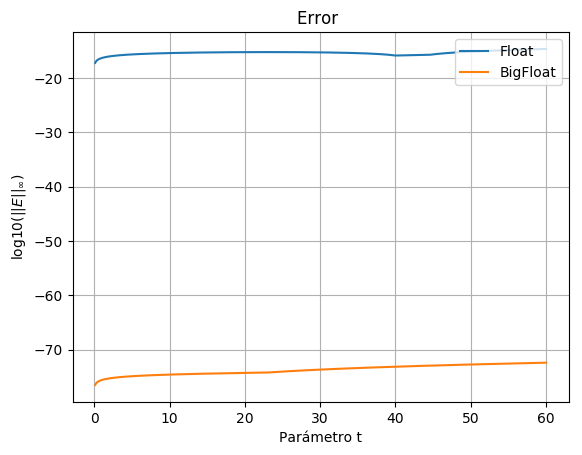

PyObject <matplotlib.legend.Legend object at 0x7fa0b8682d90>

In [23]:
plot(E[1],log10(E[2]),marker= "None", label="Float")
plot(EBig[1],log10(EBig[2]),marker= "None", label="BigFloat")
xlabel("Parámetro t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error ")
grid("on")
legend(loc="upper right",fancybox="true" )

Para observar cómo va la variedad graficaremos el espacio fase

In [37]:
#esta es una función para evaluar el los polinomios que calculamos
# recibe como entrada el tiempo que es el valor del parámetro t, el paso
# que define en pasos de cuanto queremos ir evaluando y claro los polinomios A,B
function evaluar(Tiempo, paso,A,B,vari)
    ValX=Float64[]
    
    ValY=Float64[]

    for t = 0:paso:Tiempo
        
        x = evaluate(A,t)
        y = evaluate(B,t)
        
        push!(ValX,x)
        push!(ValY,y)
        
    end
    p = plot(ValX,ValY,linestyle="-",label = vari)
    xlim(-35,8)
    ylim(-6,6)
    
end

evaluar (generic function with 1 method)

In [38]:
function Graficar(Tiempo, paso, k,l,A,B,vari)
    #graficarMap(k,l)
    evaluar(Tiempo,paso,A,B,vari)
end

Graficar (generic function with 1 method)

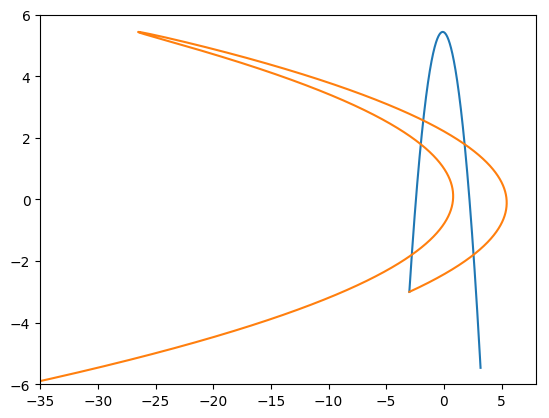

(-6,6)

In [39]:
Graficar(50.7,0.025,8.,1.,Polinomio[1],Polinomio[2],"estable")
Graficar(450.7,0.025,8.,1.,PolinomioB[1],PolinomioB[2],"inestable")